### 高斯贝叶斯

#### 数据准备

In [3]:
import pandas as pd
skin = pd.read_excel("C:/Users/ylc/GitHub/Learning/Python/PyhtonDataMiningFromZero/Skin_Segment.xlsx")

In [5]:
skin.head()

,B,G,R,y
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


In [6]:
# 由于y是用1和2进行表示的，所以先设置正例和负例，用1和0表示
skin.y = skin.y.map({2:0, 1:1})
skin.y.value_counts()

0    194198
1     50859
Name: y, dtype: int64

#### 建立高斯贝叶斯模型

In [8]:
from sklearn import model_selection
from sklearn import naive_bayes
X_train, X_test, y_train, y_test = model_selection.train_test_split(skin.iloc[:,:3], skin.y, test_size=0.25, random_state=1234)
gnb = naive_bayes.GaussianNB() # 调用高斯朴素贝叶斯分类器的“类”
gnb.fit(X_train, y_train) # 拟合模型

GaussianNB(priors=None, var_smoothing=1e-09)

#### 模型预测

In [9]:
gnb_pred = gnb.predict(X_test) # 模型在测试数据集上的预测
pd.Series(gnb_pred).value_counts() # 各类别的预测数量

0    50630
1    10635
dtype: int64

#### 模型评估

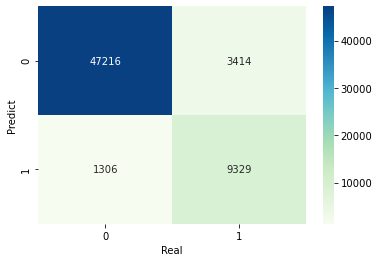

In [10]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

cm = pd.crosstab(gnb_pred, y_test) # 构建混淆矩阵
sns.heatmap(cm, annot=True, cmap='GnBu', fmt='d') # 绘制混淆矩阵图
plt.xlabel('Real')
plt.ylabel('Predict')
plt.show()

In [12]:
print('模型的准确率为：\n', metrics.accuracy_score(y_test, gnb_pred))
print('模型的评估报告：\n', metrics.classification_report(y_test, gnb_pred))

模型的准确率为：
 0.9229576430261976
模型的评估报告：
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     48522
           1       0.88      0.73      0.80     12743

    accuracy                           0.92     61265
   macro avg       0.90      0.85      0.88     61265
weighted avg       0.92      0.92      0.92     61265



#### ROC曲线

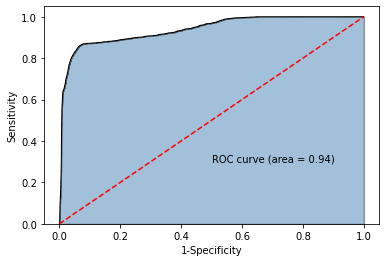

In [13]:
# 计算正例的预测概率，用于生成ROC曲线的数据
y_score = gnb.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr, tpr) # 计算AUC的值
plt.stackplot(fpr, tpr, colors='steelblue', alpha=0.5, edgecolor='black') # 绘制面积图
plt.plot(fpr, tpr, color='black', lw=1) # 添加边际线
plt.plot([0, 1], [0, 1], color='red', linestyle='--') # 添加对角线
plt.text(0.5, 0.3, 'ROC curve (area = %0.2f)' % roc_auc) # 添加文本信息
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

### 多项式贝叶斯

#### 数据准备

In [1]:
import pandas as pd
mushrooms = pd.read_csv("C:/Users/ylc/GitHub/Learning/Python/PyhtonDataMiningFromZero/mushrooms.csv")
mushrooms.head()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,poisonous,convex,smooth,brown,yes,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,yes,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,yes,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,yes,pungent,free,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,equal,smooth,smooth,white,white,white,one,evanescent,brown,abundant,grasses


In [2]:
# 将字符型数据做因子化处理，将其转换为整数型数据
columns = mushrooms.columns[1:]
for columns in columns:
    mushrooms[columns] = pd.factorize(mushrooms[columns])[0]
mushrooms.head()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,poisonous,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,edible,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1
2,edible,1,0,2,0,2,0,0,1,1,0,1,0,0,0,0,0,0,0,1,1,2
3,poisonous,0,1,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,edible,0,0,3,1,3,0,1,1,0,1,0,0,0,0,0,0,0,1,1,2,1


> factorize函数返回的是两个元素的元组，第一个元素为转换成的数值，第二个元素为数值对应的字符水平，所以在类型转换时，需要通过索引方式返回因子化值

#### 建立模型

In [4]:
# 将数据集拆分为训练集和测试集
Predictors = mushrooms.columns[1:]
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(mushrooms[Predictors], mushrooms['type'],
                                                                   test_size=0.25, random_state=10)
from sklearn import naive_bayes
mnb = naive_bayes.MultinomialNB() # 构建多项式贝叶斯分类器的“类”
mnb.fit(X_train, y_train) # 基于训练数据集的拟合

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

#### 模型预测

In [5]:
mnb_pred = mnb.predict(X_test) # 基于测试数据集的预测
from sklearn import metrics
print('模型的准确率为: \n', metrics.accuracy_score(y_test, mnb_pred))
print('模型的评估报告: \n', metrics.classification_report(y_test, mnb_pred))

模型的准确率为: 
 0.8700147710487445
模型的评估报告: 
               precision    recall  f1-score   support

      edible       0.85      0.92      0.88      1072
   poisonous       0.90      0.82      0.86       959

    accuracy                           0.87      2031
   macro avg       0.87      0.87      0.87      2031
weighted avg       0.87      0.87      0.87      2031



#### 混淆矩阵

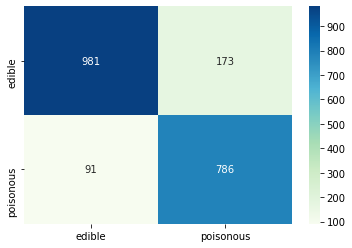

In [9]:
cm = pd.crosstab(mnb_pred, y_test) # 构建混淆矩阵
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, cmap='GnBu', fmt='d') # 绘制混淆矩阵图
plt.xlabel('')
plt.ylabel('')
plt.show()

#### ROC曲线

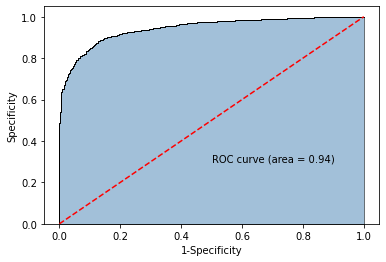

In [11]:
# 计算正例的预测概率，用于生成ROC曲线的数据
y_score = mnb.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test.map({'edible':0, 'poisonous':1}), y_score)
roc_auc = metrics.auc(fpr, tpr) # 计算AUC的值
plt.stackplot(fpr, tpr, colors='steelblue', alpha=0.5, edgecolor='black') # 绘制面积图
plt.plot(fpr, tpr, color='black', lw=1) # 添加边际线
plt.plot([0, 1], [0, 1], color='red', linestyle='--') # 添加对角线
plt.text(0.5, 0.3, 'ROC curve (area = %0.2f)' % roc_auc) # 添加文本信息
plt.xlabel('1-Specificity')
plt.ylabel('Specificity')
plt.show()

### 伯努利贝叶斯分类器

#### 数据准备

In [17]:
import pandas as pd
evaluation = pd.read_excel("C:/Users/ylc/GitHub/Learning/Python/PyhtonDataMiningFromZero/Contents.xlsx", sheet_name=0)
evaluation.head()

,NickName,Date,Content,Type
0,AdJQKzNaZWAV,2016-04-14 23:30:42,想知道是不是卖家给我发错货了，怎么四个连接铁通的仅一个能连上，**块钱的东西说便宜也不至于廉...,Negative
1,sdmjk,2013-06-24 22:37:51,垃圾。\n两个管两头一样粗，得自己用钳子摄细才能装上\n管子很软很细\n总的评价 - 就是两...,Negative
2,f***n,2015-06-05 21:10:31,我就无语了...难弄到死..又没说明书..过段差评..,Negative
3,jd_817039867,2014-04-13 22:43:38,不满意，明明写的落地！结果差一截！而且自垂度不怎么好～还要用夹子夹！没有我在附近小超市买的质...,Negative
4,jd_wscj529,2014-06-09 13:06:17,标的次日到达，结果快递用了四天，蚊帐杆底座太小，管壁太薄，而且蚊帐也没宣传那么垂地，此次购物...,Negative


In [18]:
# 运用正则表达式，将评论中的数字和英文去除
evaluation.Content = evaluation.Content.str.replace('[0-9a-zA-Z]', '')
evaluation.head()

,NickName,Date,Content,Type
0,AdJQKzNaZWAV,2016-04-14 23:30:42,想知道是不是卖家给我发错货了，怎么四个连接铁通的仅一个能连上，**块钱的东西说便宜也不至于廉...,Negative
1,sdmjk,2013-06-24 22:37:51,垃圾。\n两个管两头一样粗，得自己用钳子摄细才能装上\n管子很软很细\n总的评价 - 就是两...,Negative
2,f***n,2015-06-05 21:10:31,我就无语了...难弄到死..又没说明书..过段差评..,Negative
3,jd_817039867,2014-04-13 22:43:38,不满意，明明写的落地！结果差一截！而且自垂度不怎么好～还要用夹子夹！没有我在附近小超市买的质...,Negative
4,jd_wscj529,2014-06-09 13:06:17,标的次日到达，结果快递用了四天，蚊帐杆底座太小，管壁太薄，而且蚊帐也没宣传那么垂地，此次购物...,Negative


In [3]:
import jieba
# 加载自定义词库
jieba.load_userdict("C:/Users/ylc/GitHub/Learning/Python/PyhtonDataMiningFromZero/all_words.txt")
with open("C:/Users/ylc/GitHub/Learning/Python/PyhtonDataMiningFromZero/mystopwords.txt", encoding='UTF-8') as words:
    stop_words = [i.strip() for i in words.readlines()]
# 构造分词的自定义函数，并在分词过程中删除停止词
def cut_word(sentence):
    words = [i for i in jieba.lcut(sentence) if i not in stop_words]
    # 用空格将词隔开
    result = ' '.join(words)
    return(result)
words = evaluation.Content.apply(cut_word) # 调用自定义函数，并对评论内容进行批量分词
words[:5]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ylc\AppData\Local\Temp\jieba.cache
Loading model cost 0.822 seconds.
Prefix dict has been built successfully.


0                  想 卖家 给我发 错货 四个 连接 铁通 块钱 便宜 廉价 退货
1           垃圾 \n 钳子 摄细 装 \n 管子 很软 \n 评价         垃圾
2                       我就 无语 难弄 .. 说明书 .. 过段 差评 ..
3    不满意 写 落地 差一截 垂度 ～ 夹子 夹 没有 超市 买 质量好 换季 卖得 价钱 便宜
4      标的 到达 快递 四天 蚊帐 底座 太小 管壁 太薄 蚊帐 也没 宣传 垂地 购物 失败
Name: Content, dtype: object

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
counts = CountVectorizer(min_df=0.01) # 计算每个词在各评论内容中的次数，并将稀疏度为99%以上的词删除
dtm_counts = counts.fit_transform(words).toarray() # 文档词条矩阵
columns = counts.get_feature_names() # 矩阵的列名称
X = pd.DataFrame(dtm_counts, columns=columns) # 将矩阵转换为数据框，即X变量
y = evaluation.Type # 情感标签变量
X.head()

,一根,下单,不值,不好,不想,不满意,不知道,不行,不错,买回来,...,还好,还行,退货,送货,速度,钢管,防蚊,非常好,颜色,麻烦
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 构建模型

In [8]:
# 数据集拆分为训练集和测试集
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.25, random_state=1)
from sklearn import naive_bayes
bnb = naive_bayes.BernoulliNB() # 构建伯努利贝叶斯分类器
bnb.fit(X_train, y_train) # 拟合模型

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

#### 模型预测与评价

In [13]:
bnb_pred = bnb.predict(X_test) # 模型在测试集上的预测
from sklearn import metrics
print('模型的准确率为：\n', metrics.accuracy_score(y_test, bnb_pred))
print('模型的评估报告：\n', metrics.classification_report(y_test, bnb_pred))

模型的准确率为：
 0.8467317806160781
模型的评估报告：
               precision    recall  f1-score   support

    Negative       0.82      0.89      0.85      1341
    Positive       0.88      0.80      0.84      1321

    accuracy                           0.85      2662
   macro avg       0.85      0.85      0.85      2662
weighted avg       0.85      0.85      0.85      2662



#### 混淆矩阵

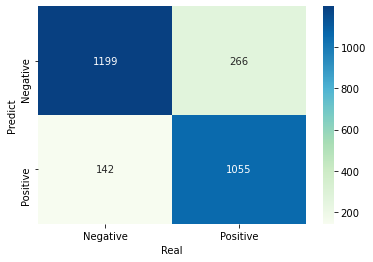

In [14]:
cm = pd.crosstab(bnb_pred, y_test) # 构建混淆矩阵
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, cmap='GnBu', fmt='d') # 绘制混淆矩阵
plt.xlabel('Real')
plt.ylabel('Predict')
plt.show()

#### ROC曲线

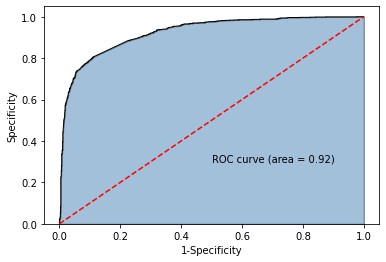

In [15]:
y_score = bnb.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test.map({'Negative':0, 'Positive':1}), y_score)
roc_auc = metrics.auc(fpr, tpr) # 计算AUC值
plt.stackplot(fpr, tpr, colors='steelblue', alpha=0.5, edgecolor='black') # 绘制面积图
plt.plot(fpr, tpr, color='black', lw=1) # 添加边际线
plt.plot([0, 1], [0, 1], color='red', linestyle='--') # 添加对角线
plt.text(0.5, 0.3, 'ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel("1-Specificity")
plt.ylabel("Specificity")
plt.show()